In [1]:
from pymzm.Roi import *

No module named 'ms_deisotope._c.averagine' averagine
No module named 'ms_deisotope._c.scoring'
No module named 'ms_deisotope._c.deconvoluter_base'
No module named 'ms_deisotope._c.deconvoluter_base'
No module named 'ms_deisotope._c.deconvoluter_base'


In [186]:
#input_file = '/Users/tong/Downloads/Beer_multibeers_1_fullscan1.mzML'
input_file = '/Users/tong/Downloads/Beer_multibeers_2_fullscan1.mzML'
good_roi=make_roi(input_file)

In [193]:
input_file2 = '/Users/tong/Downloads/Urine_StrokeDrugs_02_fullscan.mzML'
#input_file2 = '/Users/tong/Downloads/Urine_StrokeDrugs_03_fullscan.mzML'
good_roi2=make_roi(input_file2)

In [3]:
import time

In [176]:
#original greedy cluster
start=time.time()
#cluster=greedy_roi_cluster(good_roi)
cluster=greedy_roi_cluster(good_roi2)
end=time.time()
print(end-start)

530.0521149635315


In [8]:
print(cluster)

[[ROI with data points=596 mz (116.0711-116.0706) rt (661.0790-1440.1600) mean_mz (116.0706) 
, ROI with data points=332 mz (117.0740-117.0738) rt (690.9190-1115.5300) mean_mz (117.0739) 
, ROI with data points=338 mz (70.0652-70.0651) rt (678.4980-1110.2400) mean_mz (70.0652) 
, ROI with data points=58 mz (117.0678-117.0676) rt (700.8830-772.2740) mean_mz (117.0676) 
, ROI with data points=62 mz (118.0747-118.0748) rt (699.6410-775.9800) mean_mz (118.0748) 
, ROI with data points=76 mz (157.0970-157.0973) rt (676.0220-769.8030) mean_mz (157.0972) 
, ROI with data points=42 mz (118.0772-118.0769) rt (707.2470-758.6560) mean_mz (118.0771) 
, ROI with data points=38 mz (71.0685-71.0686) rt (707.2470-751.1910) mean_mz (71.0685) 
, ROI with data points=18 mz (231.1344-231.1340) rt (710.9680-732.0400) mean_mz (231.1339) 
], [ROI with data points=870 mz (118.0863-118.0861) rt (0.1164-1115.5300) mean_mz (118.0862) 
, ROI with data points=81 mz (119.0897-119.0898) rt (616.3950-715.9560) mean_m

In [5]:
#make a mass difference list
def difference_list(cluster_result):
    difference=[]
    for group_num in range(len(cluster_result)):
        diff_list=[]
        for i in range(len(cluster_result[group_num])):
            for j in range(i+1,len(cluster_result[group_num])):
                diff_list.append(abs(cluster_result[group_num][i].get_mean_mz()-cluster_result[group_num][j].get_mean_mz()))
        difference.append(diff_list)
    return difference

In [6]:
#make a mass difference array
def plot_data(difference_list):
    all_data=[]
    for i in range(len(difference_list)):
        for j in range(len(difference_list[i])):
            all_data.append(difference_list[i][j])
    final_data=np.array(all_data)
    return final_data


#plot mass difference
def difference_plot(final_data):
#final_data
    plt.figure(figsize=(20,8))
    plt.xlabel('interval')
    plt.ylabel("count")
    plt.title("mass difference distribution")
    plt.grid(True)
    plt.hist(final_data, bins=np.arange(0, max(final_data)+1, 0.5))

    
#make the plot more readable
def cut_plot(final_data, n, interval):    
    plt.figure(figsize=(20,8))
    plt.xlabel('interval')
    plt.ylabel("count")
    plt.title("mass difference distribution")
    plt.grid(True)
    plt.hist(final_data, bins=np.arange(0, n, interval))

In [7]:
import random

In [9]:
#get random mass difference baseline 
def random_baseline(roi_list, length):
    baseline_diff=[]
    for i in range(len(roi_list)):
        for j in range(i+1,len(roi_list)):
            baseline_diff.append(abs(roi_list[i].get_mean_mz()-roi_list[j].get_mean_mz()))
#print(len(baseline_diff))
    random_baseline=random.choices(baseline_diff,k=length)
    baseline_data=np.array(random_baseline)
    return baseline_data

In [10]:
#calculate the mass difference with the highest intensity
def highest_intensity_array(cluster_result):
    high_all_data=[]
    for i in range(len(cluster_result)):
        for j in range(len(cluster_result[i])-1):
            high_all_data.append(abs(cluster_result[i][0].get_mean_mz()-cluster_result[i][j+1].get_mean_mz()))
    high_final_data=np.array(high_all_data)
    return high_final_data

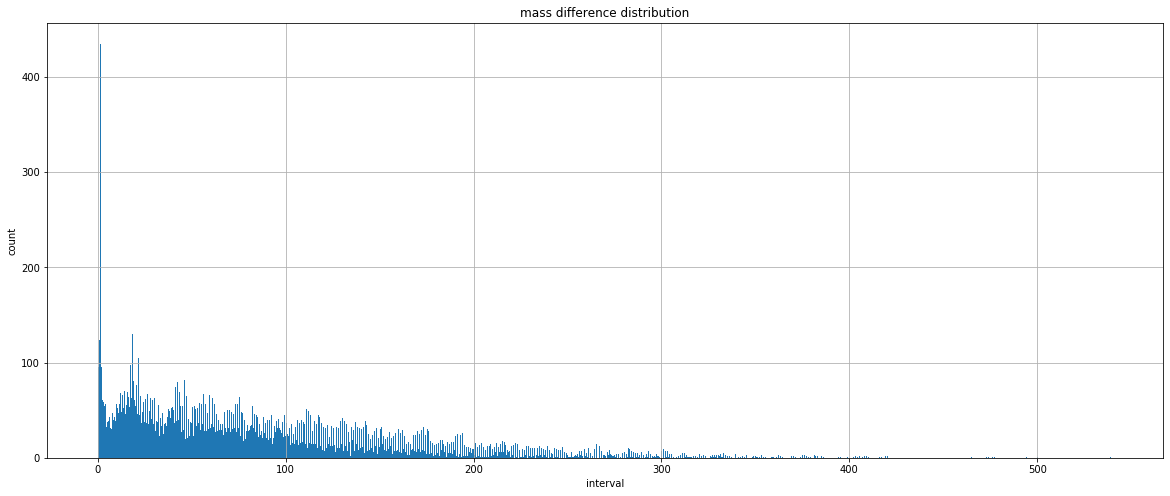

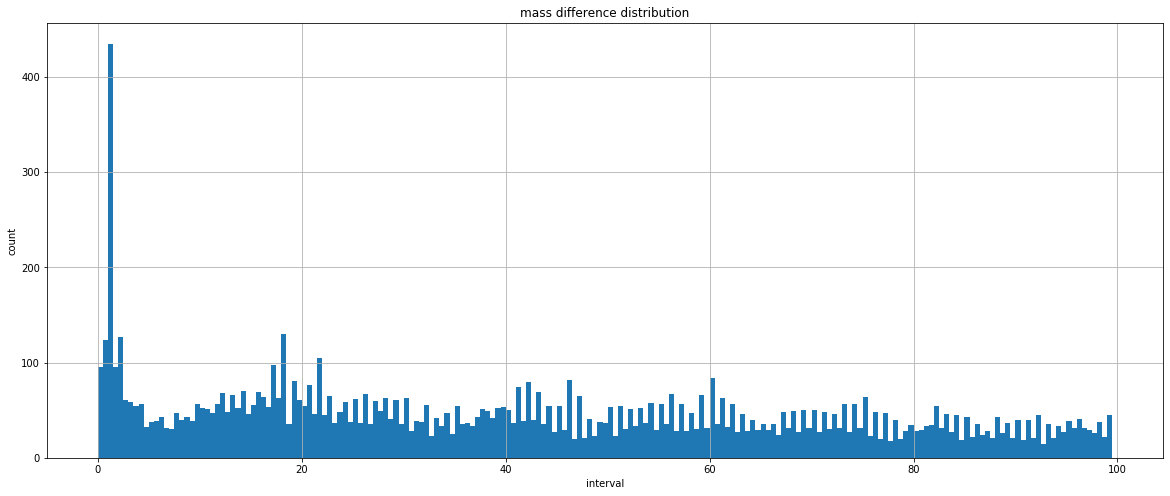

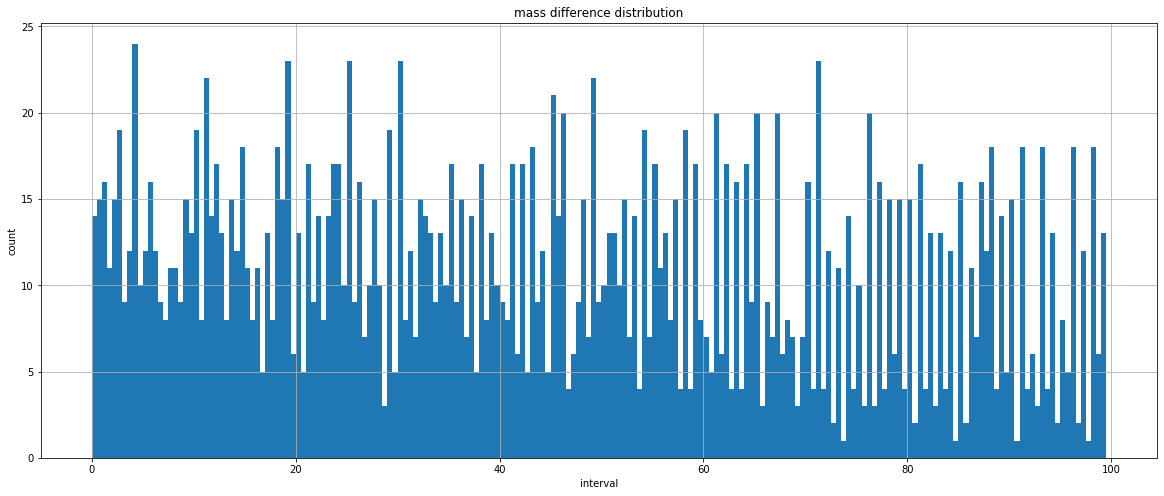

In [195]:
#mass difference plot and the random baseline of the original cluster
difference_plot(plot_data(difference_list(cluster)))
cut_plot(plot_data(difference_list(cluster)),100,0.5)
cut_plot(random_baseline(good_roi,len(difference_list(cluster))),100,0.5)

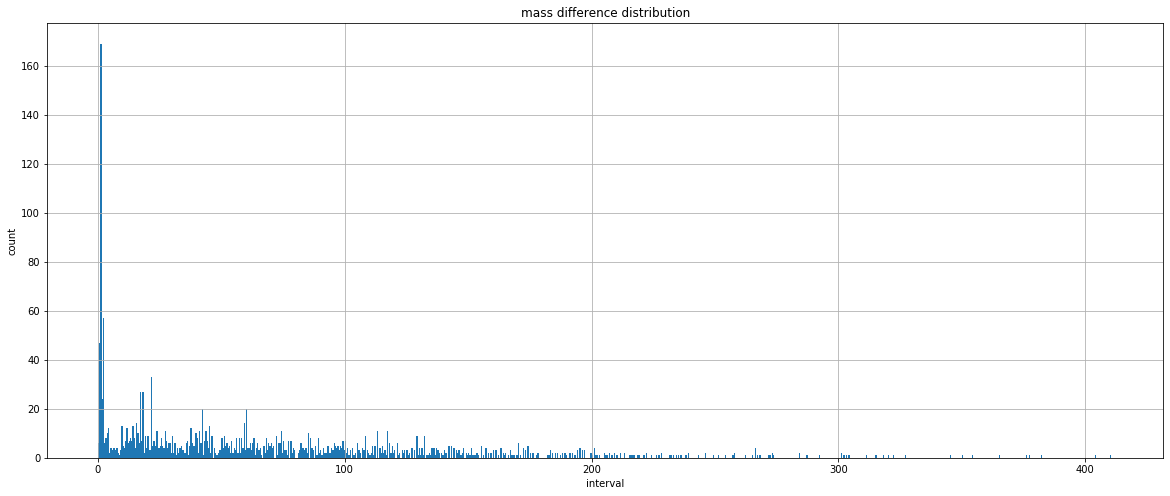

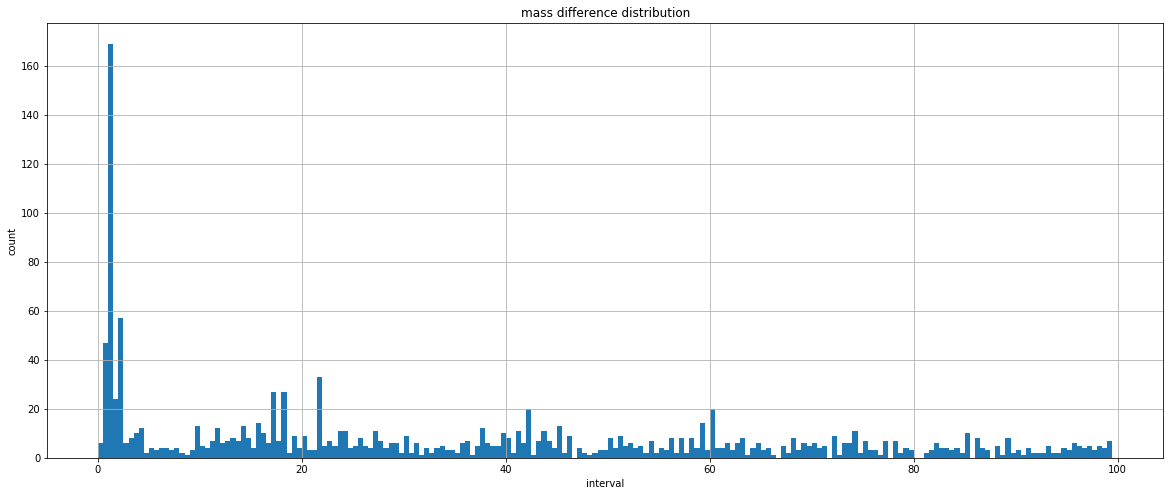

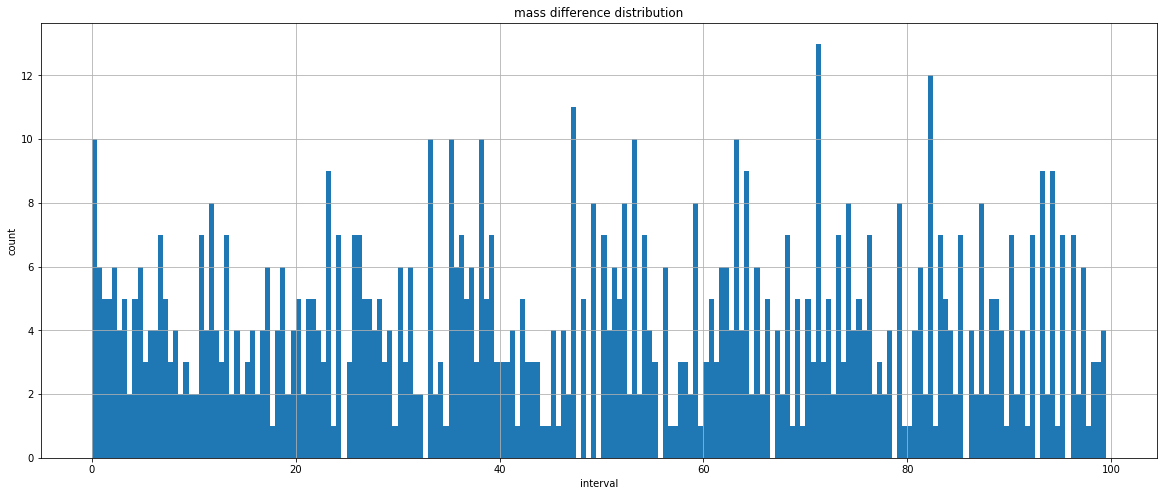

In [197]:
#mass difference plot and baseline plot (highest intensity)
difference_plot(highest_intensity_array(cluster))
cut_plot(highest_intensity_array(cluster),100,0.5)
cut_plot(random_baseline(good_roi,1719),100,0.5)

In [13]:
#new greedy cluster
#make an adduct shift list
shift_file = '/Users/tong/Downloads/shift.txt'
shifts = []
adduct_file = open(shift_file, mode='r')
for line in adduct_file:
    shifts.append(float(line))
adduct_file.close()
#print(shifts)

all_shifts=[]
shift_dict={}
for i in range(len(shifts)):
    for j in range(i+1,len(shifts)):
        all_shifts.append(shifts[j]-shifts[i])
        shift_dict[(i,j)]=shifts[j]-shifts[i]

#print(all_shifts)
#print(shift_dict)

In [161]:
peak=[i for i in all_shifts if 20.5<i<21]
print(peak)

[20.929332552]


In [162]:
list (shift_dict.keys())[list (shift_dict.values()).index (20.929332552)]

(3, 7)

In [129]:
def new_cluster(roi_list, corr_thresh=0.9,shift_thresh=0.05,corr_type='cosine'):
    # sort in descending intensity
    roi_copy = [r for r in roi_list]
    #make a dictionary to store corr
    start=time.time()
    corr_dict={}
    
    for i in range(len(roi_copy)):
        for j in range(i,len(roi_copy)):
            corr=roi_correlation(roi_copy[i], roi_copy[j])
#           corr = np.random.random()
            roi_index1=(i,j)
            roi_index2=(j,i)
            corr_dict[roi_index1]=corr
            corr_dict[roi_index2]=corr
    
    end=time.time()
    
    #make the list into a tuple list in order to get the same index
    good_roi_copy=list(enumerate(roi_copy))
    # sort in descending intensity
    good_roi_copy.sort(key=lambda x: max(x[1].intensity_list), reverse=True)
    roi_clusters = []
    
    #find isotope
    while len(good_roi_copy) > 0:
        roi_clusters.append([good_roi_copy[0]])       
        remove_idx = [0]
        new_add=1
        while new_add>0:            
            new_add=0
            if len(remove_idx)>0:
                for j, s in enumerate(good_roi_copy[remove_idx[0]:]):                 
                    corr2 = corr_dict[(good_roi_copy[0][0],s[0])]
                    shift2 = abs(s[1].get_mean_mz()-good_roi_copy[remove_idx[0]][1].get_mean_mz())  
                    if corr2 > corr_thresh and shift2>1.00335483507-shift_thresh and shift2<1.00335483507+shift_thresh:
                        roi_clusters[-1].append(s)
                        remove_idx.append(j + remove_idx[0])
                        new_add=new_add+1
            remove_idx.sort(reverse=True)
        remove_idx.sort(reverse=True)
        for r in remove_idx:
            del good_roi_copy[r]
   
       
    #find adduct 
    cluster_copy = [r for r in roi_clusters]
    adduct_clusters = []
    while len(cluster_copy)>0:
        adduct_clusters.append(cluster_copy[0])
        remove_idx= [0]
        if len(cluster_copy)>1:
            for i,r in enumerate(cluster_copy):
                corr=corr_dict[(cluster_copy[0][0][0],r[0][0])]
                shift=abs(r[0][1].get_mean_mz()-cluster_copy[0][0][1].get_mean_mz())
                for j in range(len(all_shifts)):
                    if 1>corr>corr_thresh and shift>all_shifts[j]-shift_thresh and shift<all_shifts[j]+shift_thresh:                
                        adduct_clusters[-1].extend(r)
                        remove_idx.append(i)
                        break
        remove_idx.sort(reverse=True)
        #print(len(cluster_copy))
        #print(remove_idx)
        for r in remove_idx:
            del cluster_copy[r]
            
    cluster=[]
    for i in range(len(adduct_clusters)):
        group_dict=dict(adduct_clusters[i])
        group_list=list(group_dict.values())
        cluster.append(group_list)
    all_end=time.time()
    print('dictionary time: %s Seconds'%(end-start))
    print('all time: %s Seconds'%(all_end-start))
    return cluster

In [130]:
def new_cluster_with_thresh(roi_list,split_no,corr_thresh=0.9,shift_thresh=0.05,corr_type='cosine'):
    # sort in descending intensity
    roi_copy = [r for r in roi_list]
    #make a dictionary to store corr
    start=time.time()
    corr_dict={}
    for i in range(len(roi_copy)):
        for j in range(i,len(roi_copy)):
            slice_i=get_slice_roi(roi_copy[i],split_no)
            slice_j=get_slice_roi(roi_copy[j],split_no)
            if len(slice_i.get_scan_no())>1 and len(slice_j.get_scan_no())>1:
                corr=roi_correlation(slice_i,slice_j)
            else:
                corr=0
            roi_index1=(i,j)
            roi_index2=(j,i)
            corr_dict[roi_index1]=corr
            corr_dict[roi_index2]=corr
    end=time.time()
    
    #make the list into a tuple list in order to get the same index
    good_roi_copy=list(enumerate(roi_copy))
    # sort in descending intensity
    good_roi_copy.sort(key=lambda x: max(x[1].intensity_list), reverse=True)
    roi_clusters = []
    
    #find isotope
    while len(good_roi_copy) > 0:
        roi_clusters.append([good_roi_copy[0]])       
        remove_idx = [0]
        new_add=1
        while new_add>0:            
            new_add=0
            if len(remove_idx)>0:
                for j, s in enumerate(good_roi_copy[remove_idx[0]:]):                 
                    corr2 = corr_dict[(good_roi_copy[0][0],s[0])]
                    shift2 = abs(s[1].get_mean_mz()-good_roi_copy[remove_idx[0]][1].get_mean_mz())  
                    if corr2 > corr_thresh and shift2>1.00335483507-shift_thresh and shift2<1.00335483507+shift_thresh:
                        roi_clusters[-1].append(s)
                        remove_idx.append(j + remove_idx[0])
                        new_add=new_add+1
            remove_idx.sort(reverse=True)
        remove_idx.sort(reverse=True)
        for r in remove_idx:
            del good_roi_copy[r]
      
    #find adduct 
    cluster_copy = [r for r in roi_clusters]
    adduct_clusters = []
    while len(cluster_copy)>0:
        adduct_clusters.append(cluster_copy[0])
        remove_idx= [0]
        if len(cluster_copy)>1:
            for i,r in enumerate(cluster_copy):
                corr=corr_dict[(cluster_copy[0][0][0],r[0][0])]
                shift=abs(r[0][1].get_mean_mz()-cluster_copy[0][0][1].get_mean_mz())
                for j in range(len(all_shifts)):
                    if 1>corr>corr_thresh and shift>all_shifts[j]-shift_thresh and shift<all_shifts[j]+shift_thresh:                
                        adduct_clusters[-1].extend(r)
                        remove_idx.append(i)
                        break
        remove_idx.sort(reverse=True)
        #print(len(cluster_copy))
        #print(remove_idx)
        for r in remove_idx:
            del cluster_copy[r]
            
    cluster=[]
    for i in range(len(adduct_clusters)):
        group_dict=dict(adduct_clusters[i])
        group_list=list(group_dict.values())
        cluster.append(group_list)
    all_end=time.time()
    print('dictionary time: %s Seconds'%(end-start))
    print('all time: %s Seconds'%(all_end-start))
    return cluster

In [84]:
def one_list(cluster):
    new_list=[]
    for i in range(len(cluster)):
        for j in range(len(cluster[i])):
            new_list.append(cluster[i][j])
    return new_list

In [187]:
test=new_cluster(good_roi)
print(test)

dictionary time: 1151.3717439174652 Seconds
all time: 1344.072911977768 Seconds
[[ROI with data points=865 mz (118.0862-118.0861) rt (0.1230-1113.7700) mean_mz (118.0862) 
, ROI with data points=86 mz (119.0896-119.0896) rt (610.6040-716.4300) mean_mz (119.0895) 
, ROI with data points=42 mz (119.0833-119.0834) rt (619.3270-670.3520) mean_mz (119.0833) 
, ROI with data points=39 mz (120.0928-120.0926) rt (620.5680-667.8750) mean_mz (120.0928) 
, ROI with data points=47 mz (140.0679-140.0678) rt (616.8420-674.0650) mean_mz (140.0680) 
], [ROI with data points=593 mz (116.0709-116.0706) rt (655.4090-1441.3800) mean_mz (116.0706) 
, ROI with data points=334 mz (117.0739-117.0739) rt (687.7650-1117.6300) mean_mz (117.0739) 
, ROI with data points=55 mz (117.0676-117.0676) rt (695.2070-762.6710) mean_mz (117.0676) 
, ROI with data points=33 mz (118.0772-118.0771) rt (709.0040-748.9530) mean_mz (118.0771) 
, ROI with data points=20 mz (118.0709-118.0709) rt (710.2420-733.7920) mean_mz (118.0

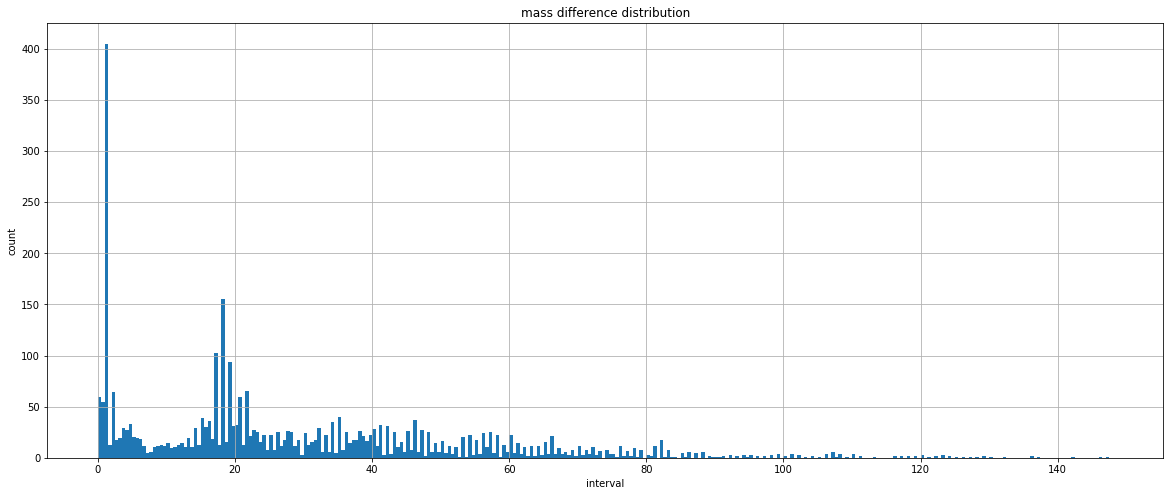

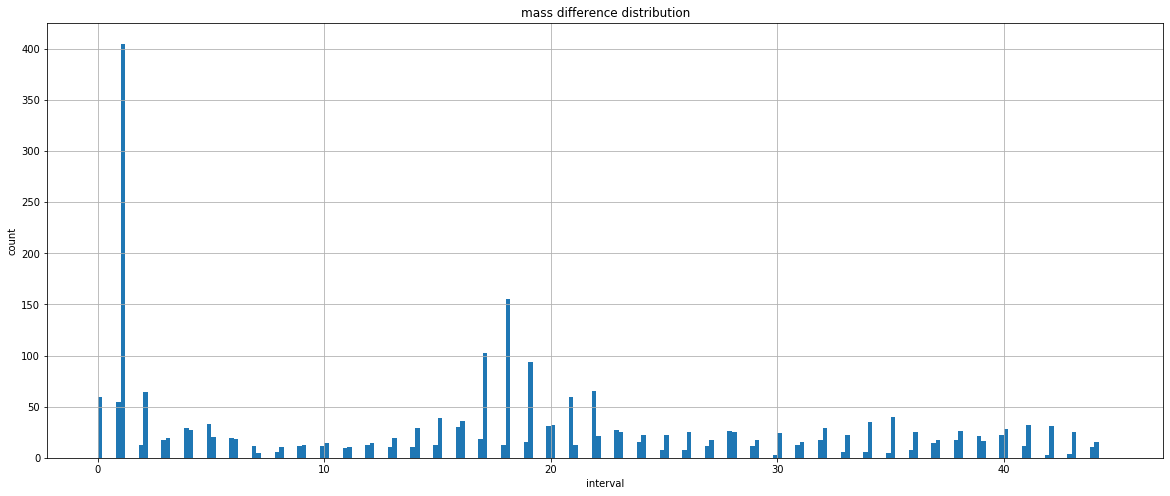

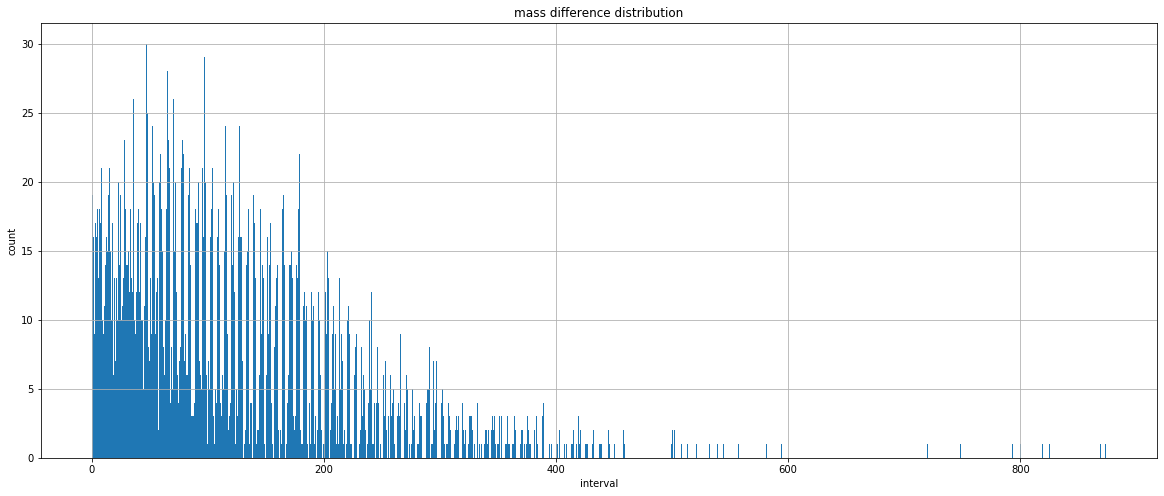

In [163]:
#mass difference plot and the random baseline of the new cluster
difference_plot(plot_data(difference_list(test)))
cut_plot(plot_data(difference_list(test)),45,0.2)
difference_plot(random_baseline(good_roi,len(difference_list(test))))

In [198]:
test2=new_cluster(good_roi2)
print(test2)

dictionary time: 896.0938372612 Seconds
all time: 1082.6857161521912 Seconds
[[ROI with data points=274 mz (132.0767-132.0768) rt (737.1650-1075.9500) mean_mz (132.0767) 
, ROI with data points=183 mz (133.0800-133.0800) rt (764.3790-990.0150) mean_mz (133.0800) 
, ROI with data points=48 mz (133.0736-133.0739) rt (766.8480-824.8860) mean_mz (133.0737) 
, ROI with data points=224 mz (134.0811-134.0811) rt (735.9320-1012.4700) mean_mz (134.0811) 
, ROI with data points=24 mz (134.0833-134.0834) rt (770.5520-798.9560) mean_mz (134.0833) 
, ROI with data points=21 mz (134.0771-134.0771) rt (771.7860-796.4890) mean_mz (134.0771) 
, ROI with data points=28 mz (154.0586-154.0586) rt (766.8480-800.1910) mean_mz (154.0586) 
, ROI with data points=187 mz (90.0550-90.0549) rt (742.1450-972.6220) mean_mz (90.0549) 
, ROI with data points=21 mz (176.0406-176.0406) rt (771.7860-796.4890) mean_mz (176.0406) 
, ROI with data points=20 mz (87.0789-87.0788) rt (774.2540-797.7220) mean_mz (87.0788) 
, R

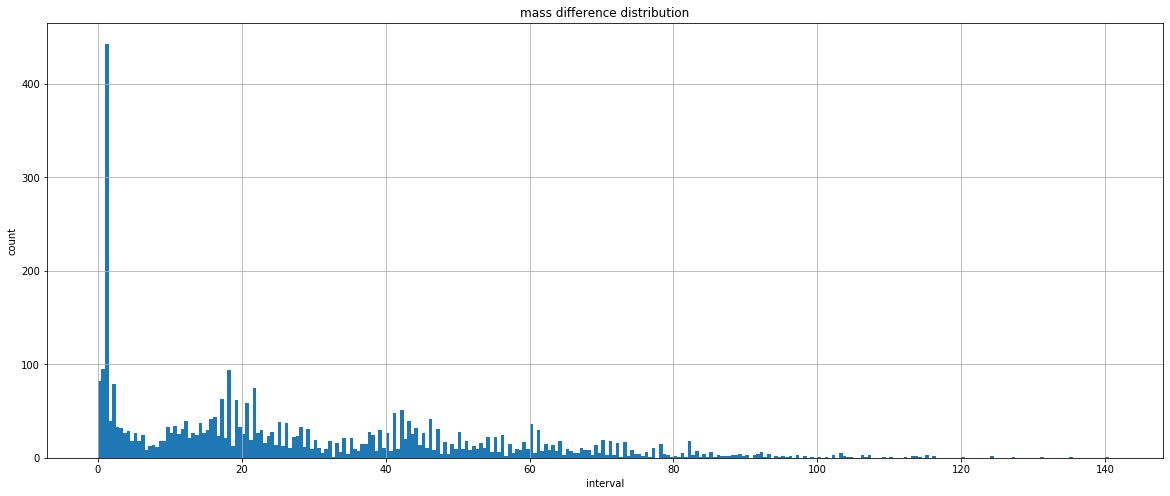

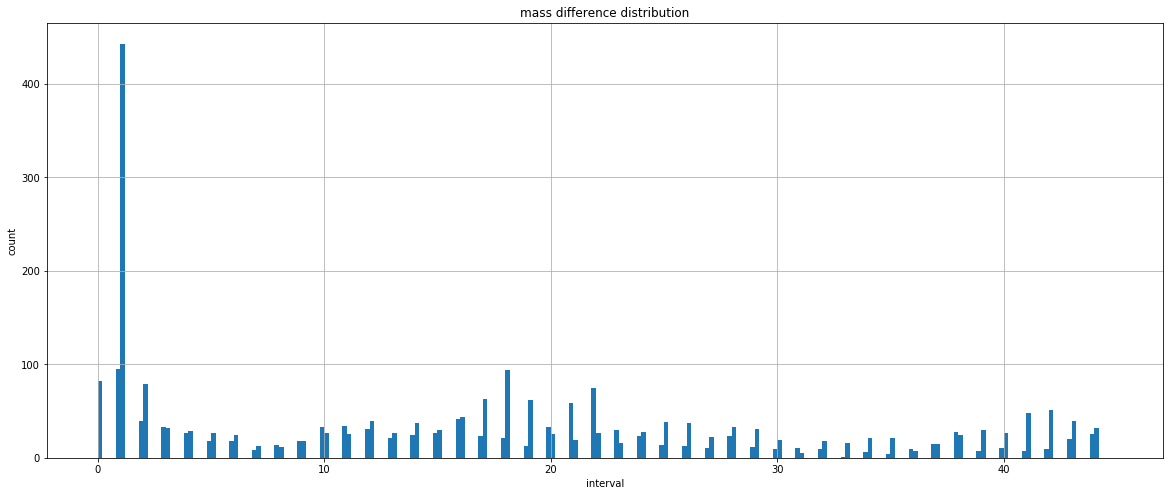

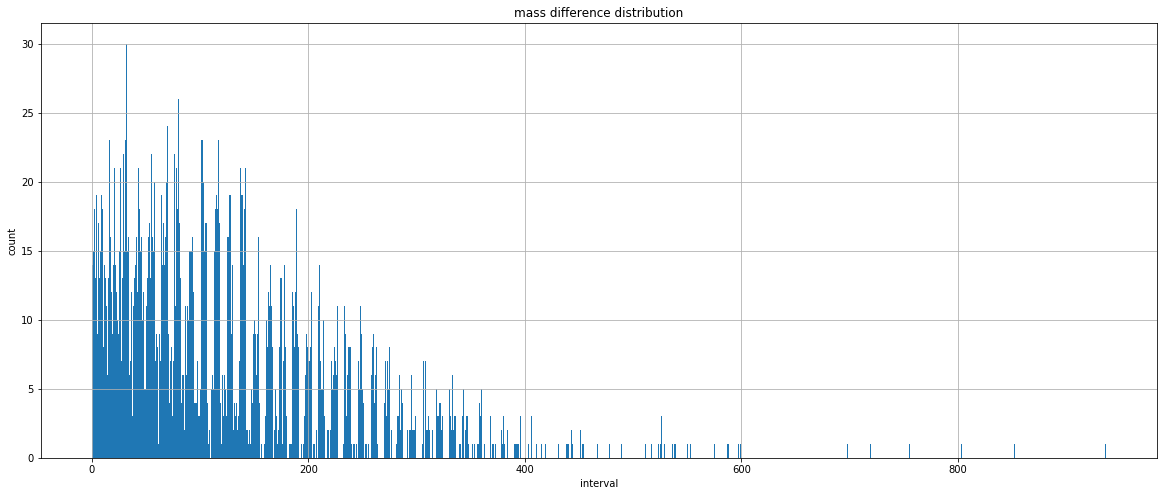

In [174]:
difference_plot(plot_data(difference_list(test2)))
cut_plot(plot_data(difference_list(test2)),45,0.2)
difference_plot(random_baseline(good_roi,len(difference_list(test2))))

In [189]:
#file1
#real time cluster
#get scan n list
scan_list1=[]
for i in range(len(good_roi)):
    scan_list1.append(good_roi[i].get_scan_no())
#print(len(scan_list))
#print(scan_list)

In [199]:
#file2
#real time cluster
#get scan n list
scan_list2=[]
for i in range(len(good_roi2)):
    scan_list2.append(good_roi2[i].get_scan_no())
#print(len(scan_list))
#print(scan_list2)

In [143]:
#cut the roi
def get_slice_roi(roi,split_thresh):
    scan_list_copy=roi.get_scan_no()
    intensity_list_copy=roi.get_intensity_list()
    mz_list_copy=roi.get_mz_list()
    rt_list_copy=roi.get_rt_list()
    
    min_index = scan_list_copy[0]
    max_index = split_thresh-min_index+1
    
    if max_index>len(scan_list_copy):
        max_index=len(scan_list_copy)
        
    return Roi(mz_list_copy[:max_index], rt_list_copy[:max_index], intensity_list_copy[:max_index], scan_list_copy[:max_index])    

In [146]:
#split the ROIs into groups: 
#i) those that are already finished
#ii) those that are in progress
#iii) those that haven’t started yet.
def make_group(roi_list,split_no,scan_list):
    roi_list_copy=[r for r in roi_list]
    group1=[]
    group2=[]
    group3=[]
    for i,r in enumerate(scan_list[:len(roi_list)]):
        if r[len(r)-1]<split_no:
            group1.append(roi_list_copy[i])
        if r[0]>split_no:
            group3.append(roi_list_copy[i])
        if r[0]<=split_no and r[len(r)-1]>=split_no:
            group2.append(roi_list_copy[i])
            
    return group1, group2, group3    

In [190]:
#file1
#perform the real_time_cluster at the first scan no
#when the scan moves, return the len_list and final_cluster
def real_time_cluster(roi_list,split_no,scan_move,times):
#   join group1 and group2
    group1,group2,group3 = make_group(roi_list,split_no,scan_list1)
    group = group1.copy()
    group.extend(group2)

    inactive_plus_final_cluster=[]
    len_cluster=[]
    len_roi=[]
    
#   cluster
    for t in range(times):

        real_time_cluster = new_cluster_with_thresh(group, split_no)

        re_cluster=[]
        for r in real_time_cluster:
            d = [False for c in r if c not in group1]
            if d:
                re_cluster.append(r)
            else:
                inactive_plus_final_cluster.append(r)

        len_cluster.append(len(inactive_plus_final_cluster))
        len_roi.append(len(one_list(inactive_plus_final_cluster)))

        new_group1,new_group2,new_group3 = make_group(roi_list,split_no+scan_move,scan_list1)
        
#       new group 1 and new group 2
        new_add_group1 = [i for i in new_group1 if i not in group1]
        new_add_group2 = [i for i in new_group2 if i not in group2]
           
        add_roi=[]
        for cluster in re_cluster:
            add_roi.extend(cluster)
        add_roi.extend(new_add_group2)

        group = add_roi
        split_no += scan_move
        group1 = new_group1
        group2 = new_group2
    
    return len_cluster,len_roi, inactive_plus_final_cluster

In [191]:
len_list_0_1000,len_roi_0_1000,inactve_cluster = real_time_cluster(good_roi,0,10,130)

dictionary time: 0.008961915969848633 Seconds
all time: 0.023773908615112305 Seconds
dictionary time: 0.7335150241851807 Seconds
all time: 0.811025857925415 Seconds
dictionary time: 0.9518790245056152 Seconds
all time: 1.1220240592956543 Seconds
dictionary time: 0.9892380237579346 Seconds
all time: 1.1783487796783447 Seconds
dictionary time: 1.048219919204712 Seconds
all time: 1.2477900981903076 Seconds
dictionary time: 1.4132680892944336 Seconds
all time: 1.6373200416564941 Seconds
dictionary time: 1.7347581386566162 Seconds
all time: 2.0024659633636475 Seconds
dictionary time: 1.9876658916473389 Seconds
all time: 2.263692855834961 Seconds
dictionary time: 2.0869200229644775 Seconds
all time: 2.345440149307251 Seconds
dictionary time: 2.372913122177124 Seconds
all time: 2.5941691398620605 Seconds
dictionary time: 2.6273033618927 Seconds
all time: 2.8689401149749756 Seconds
dictionary time: 2.709167003631592 Seconds
all time: 2.9273571968078613 Seconds
dictionary time: 3.06897521018981

dictionary time: 21.960625171661377 Seconds
all time: 22.50111985206604 Seconds
dictionary time: 22.707032918930054 Seconds
all time: 23.180907011032104 Seconds
dictionary time: 22.284451007843018 Seconds
all time: 22.721959829330444 Seconds
dictionary time: 22.34392809867859 Seconds
all time: 22.732199907302856 Seconds
dictionary time: 23.01946997642517 Seconds
all time: 23.36575698852539 Seconds
dictionary time: 23.826317071914673 Seconds
all time: 24.194008111953735 Seconds
dictionary time: 23.0652437210083 Seconds
all time: 23.38177990913391 Seconds
dictionary time: 22.42923903465271 Seconds
all time: 22.710320234298706 Seconds
dictionary time: 21.778778076171875 Seconds
all time: 22.039927005767822 Seconds
dictionary time: 3.0994415283203125e-06 Seconds
all time: 1.0013580322265625e-05 Seconds
dictionary time: 1.9073486328125e-06 Seconds
all time: 9.059906005859375e-06 Seconds
dictionary time: 4.291534423828125e-06 Seconds
all time: 1.2159347534179688e-05 Seconds
dictionary time: 

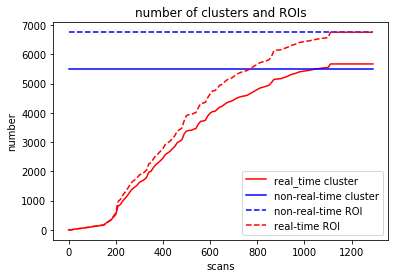

In [192]:
import matplotlib.pyplot as plt
x=range(0,1300,10)
y1=len_list_0_1000
y4=len_roi_0_1000
len_list=[len(test)]
len_roi=[len(one_list(test))]
y2=[r for r in len_list for i in range(130)]
y3=[r for r in len_roi for i in range(130)]
l1=plt.plot(x,y1,'r',label='real_time cluster')
l2=plt.plot(x,y2,'b',label='non-real-time cluster')
l3=plt.plot(x,y3,'b--',label='non-real-time ROI')
l4=plt.plot(x,y4,'r--',label='real-time ROI')
plt.title('number of clusters and ROIs')
plt.xlabel('scans')
plt.ylabel('number')
plt.legend()
plt.show()

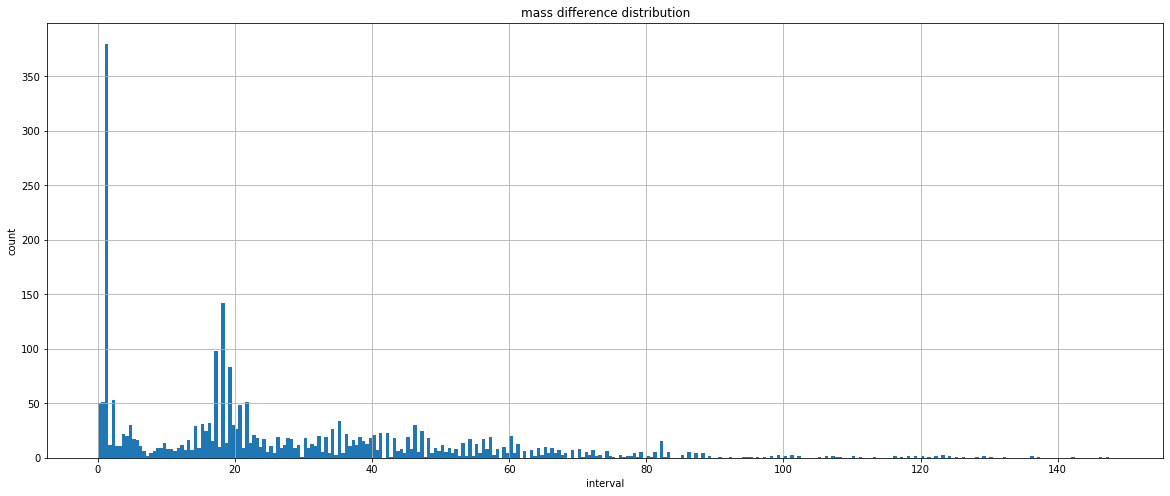

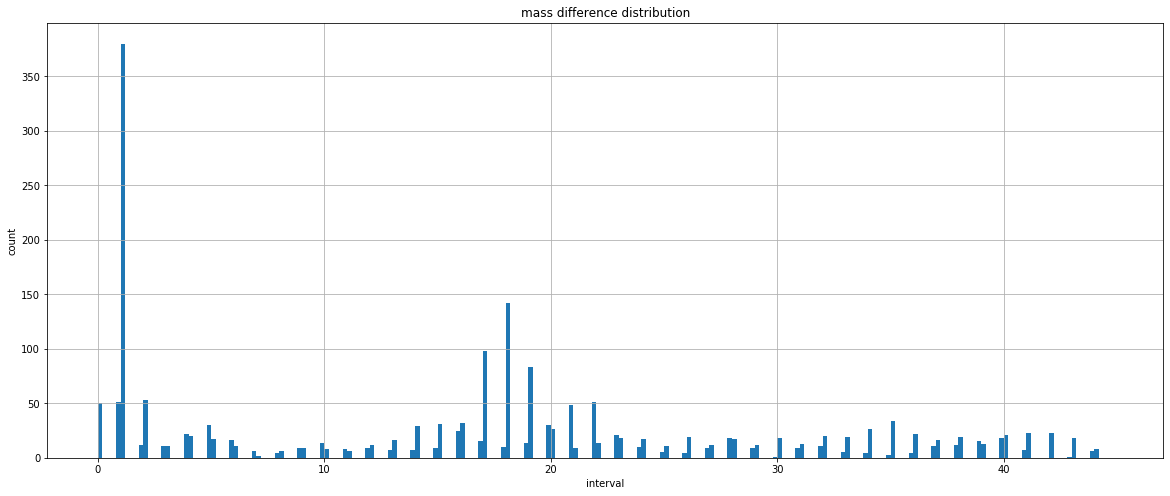

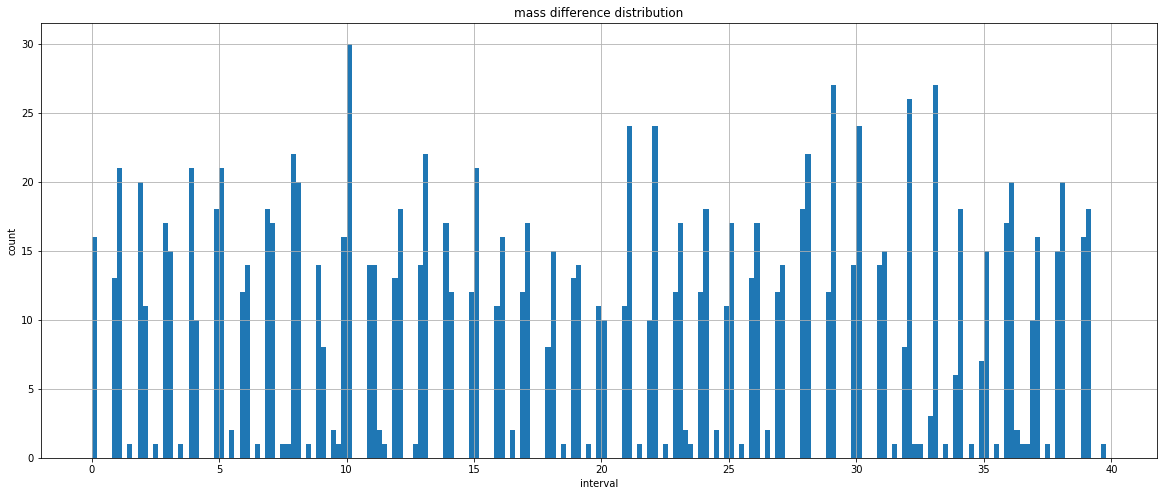

In [126]:
difference_plot(plot_data(difference_list(inactve_cluster)))
cut_plot(plot_data(difference_list(inactve_cluster)),45,0.2)
cut_plot(random_baseline(good_roi,len(difference_list(inactve_cluster))),40,0.2)

In [200]:
#file2
#perform the real_time_cluster at the first scan no
#when the scan moves, return the len_list and final_cluster
def real_time_cluster(roi_list,split_no,scan_move,times):
#   join group1 and group2
    group1,group2,group3 = make_group(roi_list,split_no,scan_list2)
    group = group1.copy()
    group.extend(group2)

    inactive_plus_final_cluster=[]
    len_cluster=[]
    len_roi=[]
    
#   cluster
    for t in range(times):

        real_time_cluster = new_cluster_with_thresh(group, split_no)

        re_cluster=[]
        for r in real_time_cluster:
            d = [False for c in r if c not in group1]
            if d:
                re_cluster.append(r)
            else:
                inactive_plus_final_cluster.append(r)

        len_cluster.append(len(inactive_plus_final_cluster))
        len_roi.append(len(one_list(inactive_plus_final_cluster)))

        new_group1,new_group2,new_group3 = make_group(roi_list,split_no+scan_move,scan_list2)
        
#       new group 1 and new group 2
        new_add_group1 = [i for i in new_group1 if i not in group1]
        new_add_group2 = [i for i in new_group2 if i not in group2]
           
        add_roi=[]
        for cluster in re_cluster:
            add_roi.extend(cluster)
        add_roi.extend(new_add_group2)

        group = add_roi
        split_no += scan_move
        group1 = new_group1
        group2 = new_group2
    
    return len_cluster,len_roi, inactive_plus_final_cluster

In [201]:
len_list2,len_roi2,inactve_cluster2 = real_time_cluster(good_roi2,0,10,130)

dictionary time: 0.0428006649017334 Seconds
all time: 0.10257887840270996 Seconds
dictionary time: 1.1095521450042725 Seconds
all time: 1.403468132019043 Seconds
dictionary time: 1.648900032043457 Seconds
all time: 2.1295530796051025 Seconds
dictionary time: 1.8419010639190674 Seconds
all time: 2.304460048675537 Seconds
dictionary time: 1.8406867980957031 Seconds
all time: 2.2588207721710205 Seconds
dictionary time: 2.128146171569824 Seconds
all time: 2.5605461597442627 Seconds
dictionary time: 2.309354066848755 Seconds
all time: 2.704257011413574 Seconds
dictionary time: 2.6125378608703613 Seconds
all time: 3.002851963043213 Seconds
dictionary time: 3.1199769973754883 Seconds
all time: 3.5352909564971924 Seconds
dictionary time: 3.5937252044677734 Seconds
all time: 4.025414228439331 Seconds
dictionary time: 3.8366751670837402 Seconds
all time: 4.2377190589904785 Seconds
dictionary time: 4.574179172515869 Seconds
all time: 5.0399932861328125 Seconds
dictionary time: 5.993018865585327 S

dictionary time: 33.60643672943115 Seconds
all time: 34.226844787597656 Seconds
dictionary time: 36.40190505981445 Seconds
all time: 37.17452788352966 Seconds
dictionary time: 42.6373131275177 Seconds
all time: 43.416303873062134 Seconds
dictionary time: 42.03035616874695 Seconds
all time: 42.90122413635254 Seconds
dictionary time: 41.399693965911865 Seconds
all time: 42.06428813934326 Seconds
dictionary time: 33.91070795059204 Seconds
all time: 34.3127658367157 Seconds
dictionary time: 22.622692823410034 Seconds
all time: 22.7946298122406 Seconds
dictionary time: 17.27155375480652 Seconds
all time: 17.480224132537842 Seconds
dictionary time: 18.497520923614502 Seconds
all time: 18.81473207473755 Seconds
dictionary time: 22.53386902809143 Seconds
all time: 22.941591024398804 Seconds
dictionary time: 25.747997999191284 Seconds
all time: 26.178139209747314 Seconds
dictionary time: 28.585383892059326 Seconds
all time: 29.093090057373047 Seconds
dictionary time: 29.337278842926025 Seconds


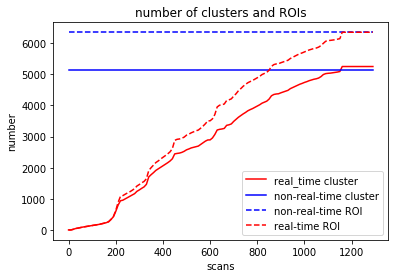

In [202]:
x=range(0,1300,10)
y1=len_list2
y4=len_roi2
len_list=[len(test2)]
len_roi=[len(one_list(test2))]
y2=[r for r in len_list for i in range(130)]
y3=[r for r in len_roi for i in range(130)]
l1=plt.plot(x,y1,'r',label='real_time cluster')
l2=plt.plot(x,y2,'b',label='non-real-time cluster')
l3=plt.plot(x,y3,'b--',label='non-real-time ROI')
l4=plt.plot(x,y4,'r--',label='real-time ROI')
plt.title('number of clusters and ROIs')
plt.xlabel('scans')
plt.ylabel('number')
plt.legend()
plt.show()